# Technical Assignment : Data Scientist Xe
## Marcelo Torres Cisterna

The following dataset comes from direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit. It´s important to mention that I won´t detail every single experiment I did, I´ll just point out the ones that gave the better results.

First, I´ll import all the necessary libraries. Most of them are well known libraries, except for __Utils__ which is a custom library I use for my data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils as ut
pd.set_option('display.max_columns', None)

Next, the given dataset is loaded, since it´s a CSV format we use the __read_csv__ method

In [2]:
data = pd.read_csv("bank-additional-full.csv")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housekeeper,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


We drop duplicate entries

In [4]:
data.drop_duplicates(inplace = True)

## Section 1: Exploratory Data Analysis

The way I approach my analysis is first of all checking for missing values in the data

In [5]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

__OBS__ : Despite having no missing values, I´ll have to check for those which have __Unknown__ as a feature

Next, some common methods such as __info__ and __describe__ are used to analyze some properties of the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [7]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Since I don´t have a whole description of the features it´s somehow a little difficult to gather conclusions from these analysis, I would point out the oldest client who is __98 years__ old which could be consider as a potential outlier.

### Section 1.1 : Data Balance

Class imbalance is one of the most common problems in Machine Learning. The plot below shows the distribution of classes:

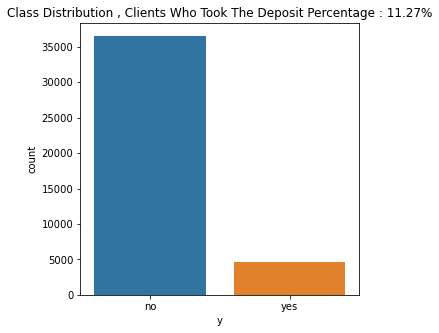

In [8]:
plt.figure(figsize = (5,5))
pos_percentage = np.round(len(data[data.y == "yes"]) / len(data) * 100 , 2)
plt.title(f"Class Distribution , Clients Who Took The Deposit Percentage : {pos_percentage}%")
sns.countplot(x = "y" , data = data);

We can see that there is a huge set imbalance, of all the examples only __11.27 %__ of them belong to customers who in fact took the deposit. This is a problem that we will have to address later. For analyzing purposes, the set is split between positive and negative classes.

In [9]:
pos_transactions = data[data.y == "yes"]
neg_transactions = data[data.y == "no"]

### Section 1.2: Numerical Features Histograms

#### Histograms For Clients Who Took The Deposit

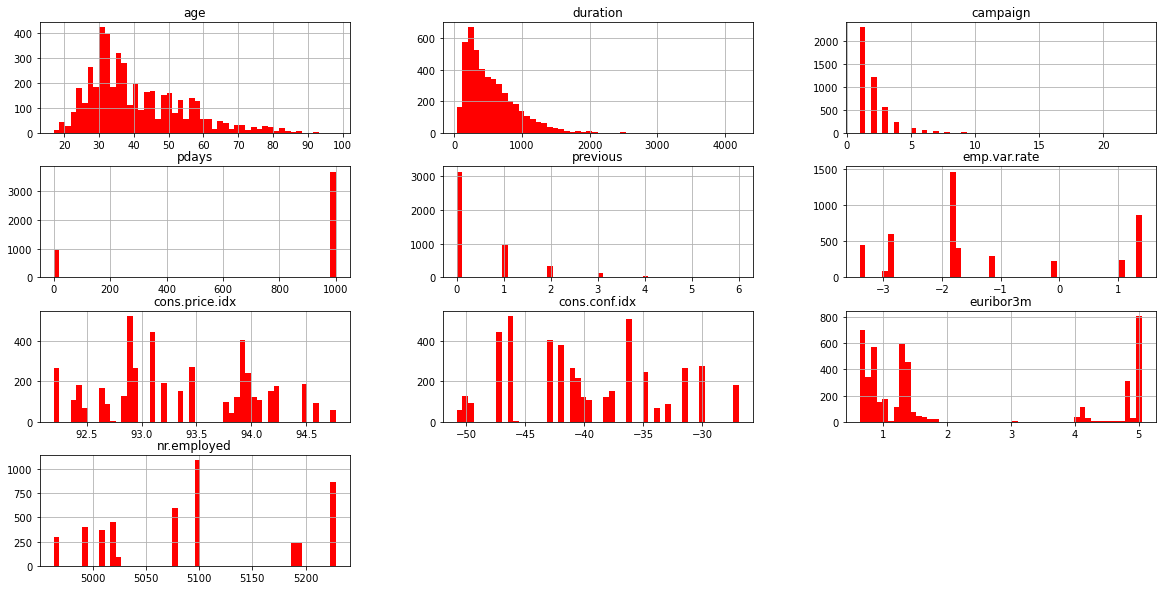

In [10]:
pos_transactions.hist(figsize = (20,10) , color = "red" , bins = 50);

#### Histogram For Clients Who Didn´t Take The Deposit

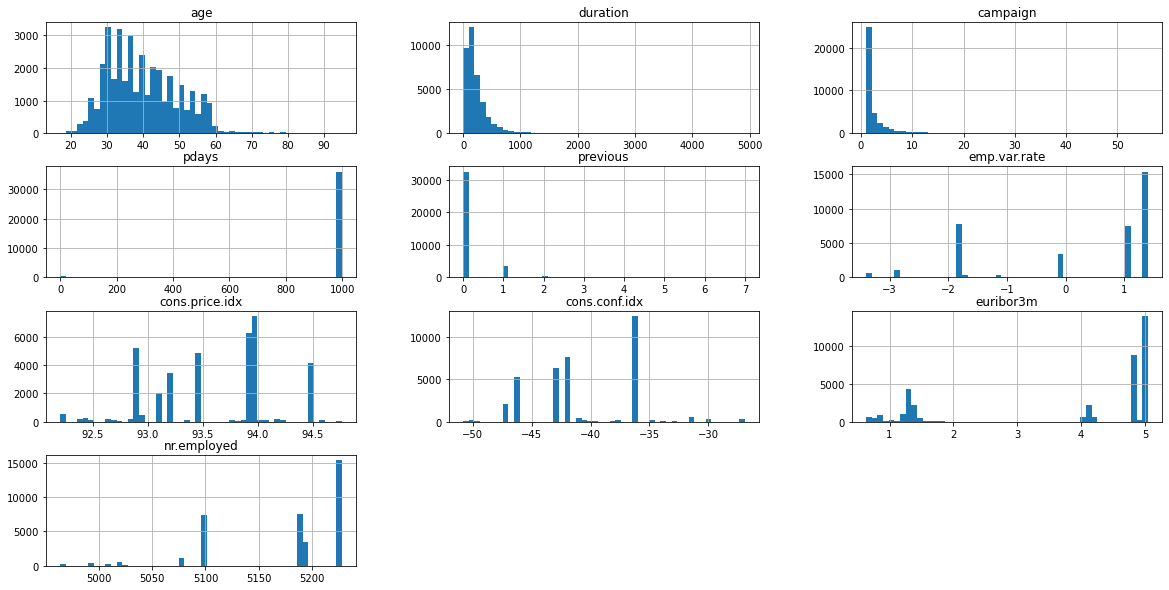

In [11]:
neg_transactions.hist(figsize = (20,10) , bins = 50);

There are many features to analyze here so I will start one by one. In __Red__ we can see clients who took the deposit and in __Blue__ the ones who didn´t. Starting with the __Age__ we can see that the majority of the data for clients who subscribed a term deposit is concentrated between 30 and 60 years old, having a similar distribution in the case of clients who didn´t subscribed the term deposit. We can obviously identify some anomalies with people who are really old (over 90 years old), so maybe a good idea is to group the clients as middle age, middle-adult, etc. Moving on to __Duration__ this is a special feature which shows the duration of the last contact with the customer. Despite the fact that it gives us information, it can only be obtained after the call and therefore after the target value is known, so it isn´t useful for building a predictive model. It´s interesting to mention that for clients who took the deposit, this duration time doubled the ones from clients who didn´t took the deposit. The __Campaign__ feature shows a very similar distribution in both type of clients indicating that the majority of times, the target client was contacted only once or twice. This feature is also dismissed.

__P_days__ shows the number of days that passed after the client was last contacted. The majority of clients in both cases were reached out 999 days after, which is another way of saying that the client was not previously contacted. Since it shows a clear common value for both cases, the features is also dismissed. __Previous__ indicates the number of contacts performed before this campaign and for this client, again we have a very similar pattern between both type of clients which doesn´t give us much information. __Employment Variation Rate__ shows some interesting information. For this I´ll calculate the top 3 rates for both type of clients.

___Employment Variation Rate For Clients Who Took The Deposit___

In [12]:
pos_transactions.groupby("emp.var.rate").size().sort_values(ascending = False).head(3)

emp.var.rate
-1.8    1461
 1.4     866
-2.9     593
dtype: int64

___Employment Variation Rate For Clients Who Didn´t Took The Deposit___

In [13]:
neg_transactions.groupby("emp.var.rate").size().sort_values(ascending = False).head(3)

emp.var.rate
 1.4    15362
-1.8     7721
 1.1     7522
dtype: int64

Leaving out the dimensionality of numbers, we see that there are two main rates __-1.8 and 1.4__. In the case of clients who took the deposit, deposits taken when rate was -1.8 almost doubled the ones taken when this rate was 1.4. In the case of clients who didn´t take the deposit, this behavior goes the other way round.

Moving on to __Consumer Price Index__ we see that there are __three__ clear peaks in the case of clients who took the deposit which are:

In [14]:
pos_transactions.groupby("cons.price.idx").size().sort_values(ascending = False).head(3)

cons.price.idx
92.893    524
93.075    442
93.918    407
dtype: int64

But again, the difference between Consumer Price isn´t so different, as a matter of facts it´s only a variation of decimals, however we are still going to consider this feature. The __Consumer Confidence Index__ is another feature with a particular behavior. If we first take a look on the customers who didn´t took the deposit, we see that there is a clear value that outstands over the others which is __-36.2__ followed by __-42,7__. However, in the case of customers who did in fact took the deposit, these index has a distribution which is more spread than customers who didn´t. These could be a useful measure te categorize these kind of users. __Euribor__ which shows the interest at which european financial institutions lend money also has a clear pattern in customers who took the deposit. For this users, the majority of deposits were taken when the euribor was rather over __4.9__ or below __1.4__. In the case of customers who didn´t take the deposit, in the majority of cases euribor was over 4.8.

Finally, and very similar to the previous features, we can see that __Number of Employees__ has a more notorious pattern in both classes of customers. In the case of customers who took the deposit, this feature is mostly represented by value __5200__ while in the case of other customers, the most frequent number of employees is __5100__.

### Section 1.3 : Categorical Features

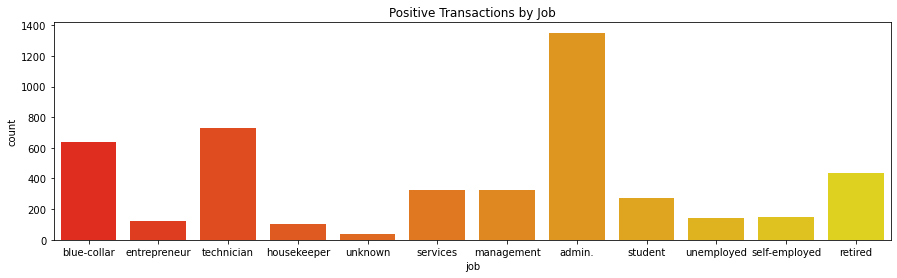

In [15]:
ut.Countplot(pos_transactions , "job" , "Positive Transactions by Job")

Starting with the __Job__ feature, we find something very interesting. People who work as an __Admin__ are the ones who took the most amount of deposits, followed by __blue-collar and technician__ , however Admins are very outstanding. This means, that we have to take a look at this feature when building models.

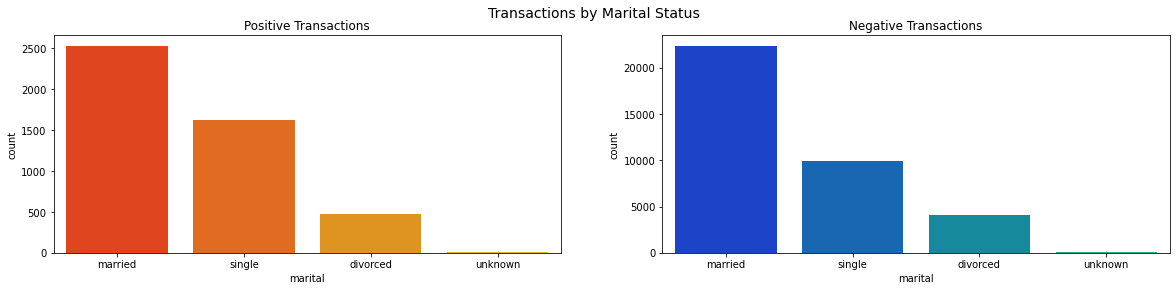

In [16]:
ut.ComparativePlot(pos_transactions , neg_transactions , "marital" , "Positive Transactions" , "Negative Transactions" , "Transactions by Marital Status" ,
                  order = ["married" , "single" , "divorced" , "unknown"])

We can´t see a huge difference in the distribution between clients who took the deposit and those who didn´t due to Marital Status, so this feature isn´t really useful.

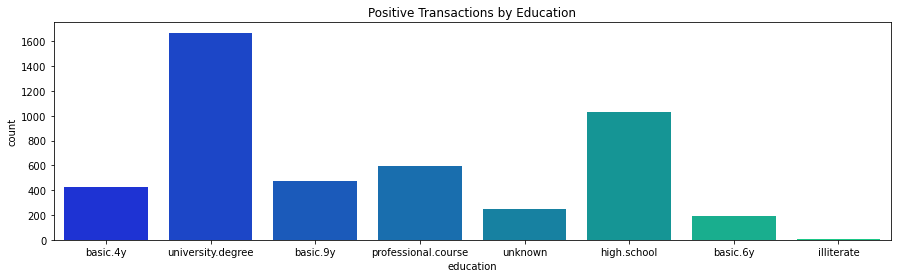

In [17]:
ut.Countplot(pos_transactions , "education" , "Positive Transactions by Education" , palette = "winter")

People with a __University Degree__ are the majority when it comes to taking a deposit. This means that these people know exactly what they are doing, they are probably very clever also so they have planned a reason to take the deposit.

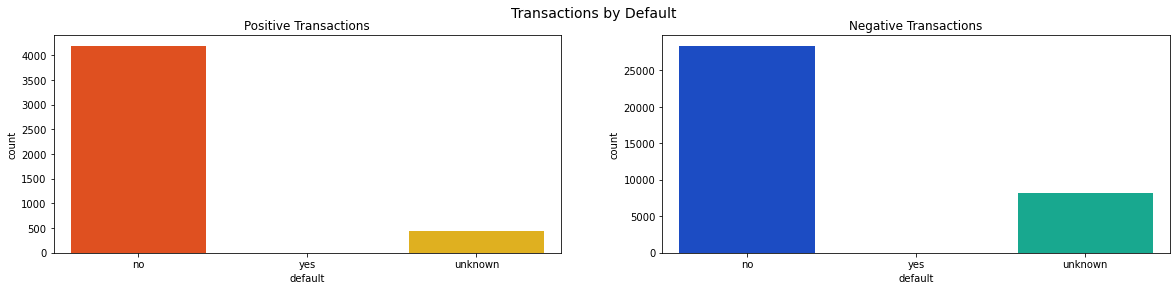

In [18]:
ut.ComparativePlot(pos_transactions , neg_transactions , "default" , "Positive Transactions" , "Negative Transactions" , "Transactions by Default" , order = ["no" , "yes" , "unknown"])

Again, __Default__ doesn´t show a huge variety between the two clients. Here, despite we have many unknown values, we don´t care because we are not going to use this feature.

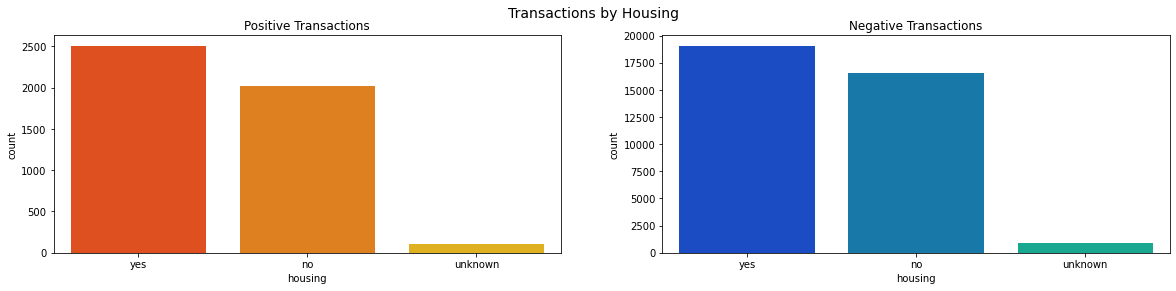

In [19]:
ut.ComparativePlot(pos_transactions , neg_transactions , "housing" , "Positive Transactions" , "Negative Transactions" , "Transactions by Housing" , order = ["yes" , "no" ,  "unknown"])

Similarly as the previous features, __housing__ doesn´t show a quite obvious difference in the distribution so it isn´t useful.

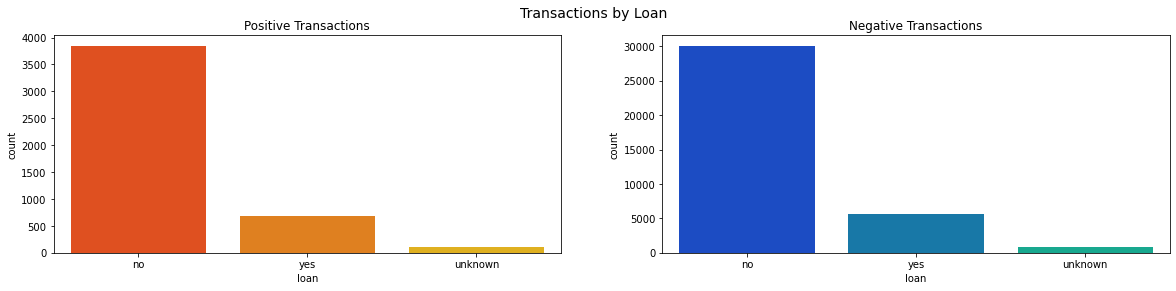

In [20]:
ut.ComparativePlot(pos_transactions , neg_transactions , "loan" , "Positive Transactions" , "Negative Transactions" , "Transactions by Loan")

Most of users who took the deposit, do not have a __Loan__. Both type of users have the same distribution, so this feature is quite useless to separate both classes.

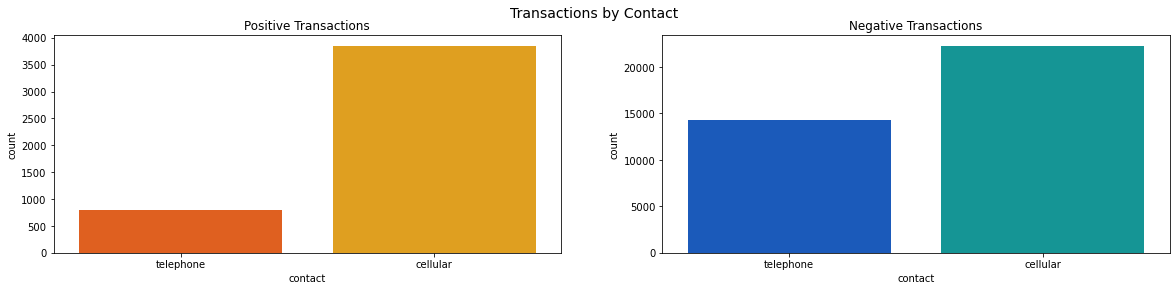

In [21]:
ut.ComparativePlot(pos_transactions , neg_transactions , "contact" , "Positive Transactions" , "Negative Transactions" , "Transactions by Contact")

The comparative charts based on the __Contact__ feature show a clear trend that, most of customers who took the loan were contacted through cellular.

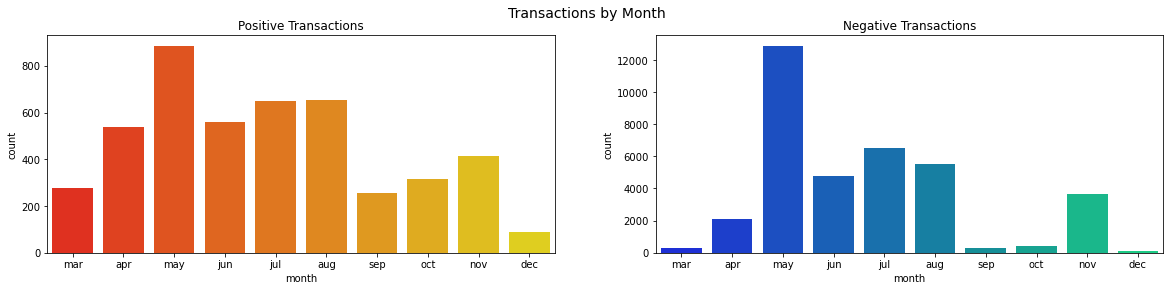

In [22]:
months = ["mar" , "apr" , "may" , "jun" , "jul" , "aug" , "sep" , "oct" , "nov" , "dec"]
ut.ComparativePlot(pos_transactions , neg_transactions , "month" , "Positive Transactions" , "Negative Transactions" , "Transactions by Month" , order = months)

The greatest amount of transactions were made during __May, June, July and August__ . It´s interesting to analyze the ratio between clients who took the deposit and the total of clients by month.

C:\Users\marce\Desktop\Xe\utils.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


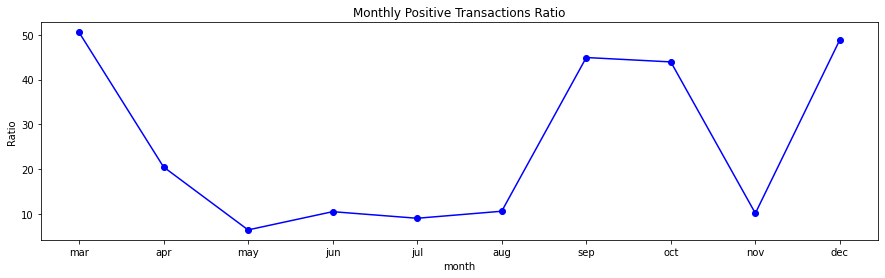

In [23]:
ratio = ut.FeatureRatio(data , "month" , months , plot_title = "Monthly Positive Transactions Ratio" , returndata=True)

What we see in the plot above shows a new conclution towards our data. Despite the fact that during __May, June, July and August__ the most amount of transactions and also the most amount of deposits happen, the ratio is the lowest meaning that nearly all of the clients didn´t in fact took the deposit. However if we look at months such as __March, September, October and December__ more than 43% of transactions executed belong to clients who took the deposit, which is a very huge amount. Therefore, definitely this feature must be taken into account.

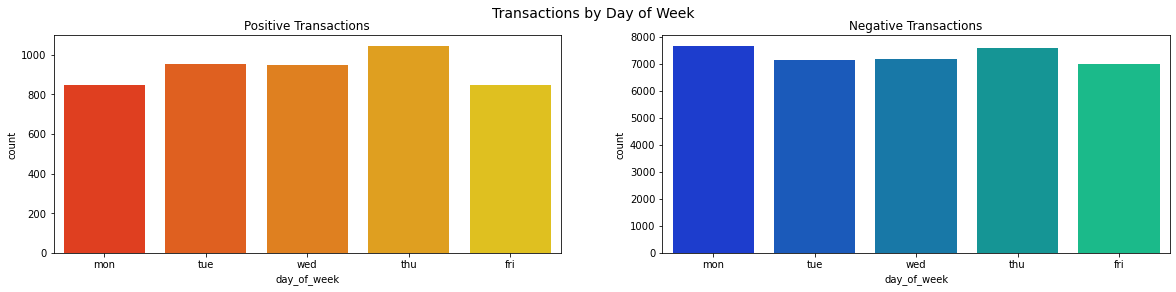

In [24]:
days = ["mon" , "tue" , "wed" , "thu" , "fri"]
ut.ComparativePlot(pos_transactions , neg_transactions , "day_of_week" , "Positive Transactions" , "Negative Transactions" , "Transactions by Day of Week" , order = days)

C:\Users\marce\Desktop\Xe\utils.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


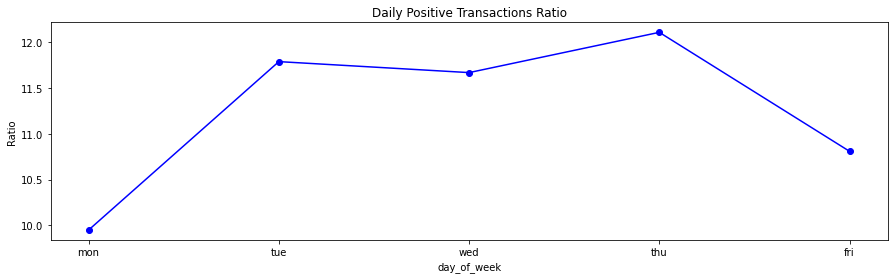

In [25]:
ut.FeatureRatio(data , "day_of_week" , days , plot_title = "Daily Positive Transactions Ratio")

In the case of daily transactions, we don´t see a notorious difference between ratio neither the days, however after some experiments, this feature was indeed useful

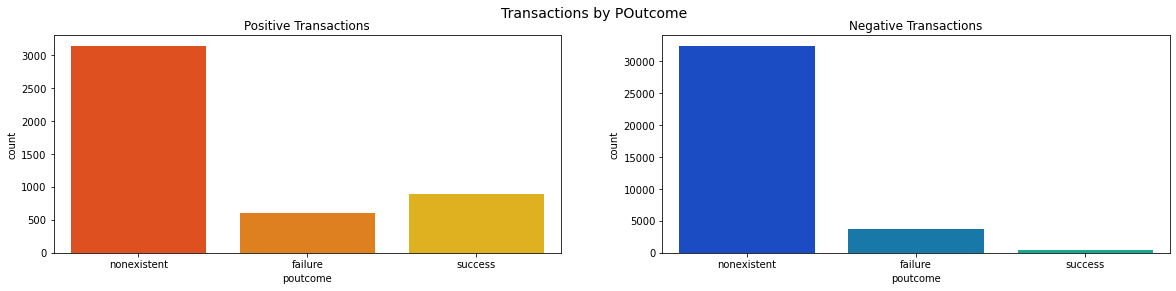

In [26]:
ut.ComparativePlot(pos_transactions , neg_transactions , "poutcome" , "Positive Transactions" , "Negative Transactions" , "Transactions by POutcome")

In the case of __POutcome__ , which shows the outcome of the previous contact, we have too many missing values identified as non existent, therefore this feature isn´t useful for our study.

Therefore as a conclusion, the following features will be used for the problem:
* Age
* Job
* Contact
* Day Of Week
* Employment Variation Rate
* Consumer Price Index
* Consumer Confidence Index
* Euribor
* Number of Employed
* Education
* Month
* Ratio Features

In [27]:
data = data[["age" , "job" , "contact" , "day_of_week" , "emp.var.rate" , "cons.price.idx" , "cons.conf.idx" , "euribor3m" , "nr.employed",
             "y" , "education" , "month"]]

## Section 2 : Feature Engineering and Cleaning

### Section 2.1 : Dealing with Unknowns

On the features we selected, some of them have __unknown__ values such as age. From the diagrams above we see that they don´t represent a significant fraction of the data so we delete them.

In [28]:
data = data[data.job != "unknown"]

__Education__ is another feature which has unknown values. To solve this, we first take a look at the job of these people.

In [29]:
data[data.education == "unknown"].groupby("job").size()

job
admin.           249
blue-collar      454
entrepreneur      57
housekeeper       42
management       123
retired           97
self-employed     29
services         150
student          167
technician       212
unemployed        19
dtype: int64

Next, we take a look at the most frequent education for the previous jobs. For example, let´s consider __admin__. The majority of admins have a university degree, therefore we fill in the unknown education as university degree

In [30]:
data[(data.job == "admin.") & (data.education != "unknown")].groupby("education").size().sort_values(ascending = False)[0:1].index[0]

'university.degree'

In [31]:
education_unq = data[data.education != "unknown"]
educ_dict = {}
for i in data.job.unique():
    temp_dat = data[data.job == i]
    educ_dict[i] =    temp_dat.groupby("education").size().sort_values(ascending = False)[0:1].index[0] 

In [32]:
educ_dict

{'housekeeper': 'basic.4y',
 'services': 'high.school',
 'admin.': 'university.degree',
 'blue-collar': 'basic.9y',
 'technician': 'professional.course',
 'retired': 'basic.4y',
 'management': 'university.degree',
 'unemployed': 'university.degree',
 'self-employed': 'university.degree',
 'entrepreneur': 'university.degree',
 'student': 'high.school'}

In [33]:
new_educt = []
for x in data.itertuples():
    if x.education == "unknown":
        temp_educt = educ_dict[x.job]
    else:
        temp_educt = x.education
    new_educt.append(temp_educt)
data['NewEducation'] = new_educt

In [34]:
data

,age,job,contact,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education,month,NewEducation
0,56,housekeeper,telephone,mon,1.1,93.994,-36.4,4.857,5191.0,no,basic.4y,may,basic.4y
1,57,services,telephone,mon,1.1,93.994,-36.4,4.857,5191.0,no,high.school,may,high.school
2,37,services,telephone,mon,1.1,93.994,-36.4,4.857,5191.0,no,high.school,may,high.school
3,40,admin.,telephone,mon,1.1,93.994,-36.4,4.857,5191.0,no,basic.6y,may,basic.6y
4,56,services,telephone,mon,1.1,93.994,-36.4,4.857,5191.0,no,high.school,may,high.school
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,cellular,fri,-1.1,94.767,-50.8,1.028,4963.6,yes,professional.course,nov,professional.course
41184,46,blue-collar,cellular,fri,-1.1,94.767,-50.8,1.028,4963.6,no,professional.course,nov,professional.course
41185,56,retired,cellular,fri,-1.1,94.767,-50.8,1.028,4963.6,no,university.degree,nov,university.degree
41186,44,technician,cellular,fri,-1.1,94.767,-50.8,1.028,4963.6,yes,professional.course,nov,professional.course


### Section 2.2 : Binning Features

After many experiments, binning worked better only for months column

As mentioned in Section 1, we realize that there are particular months in which is more likely that clients would take the deposit: __March, September, October and December__

In [35]:
ut.make_bins_categorical(data , ["mar" , "sep" , "oct" , "dec"] , "month" , "BinnedMonth")

,age,job,contact,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education,month,NewEducation,BinnedMonth
0,56,housekeeper,telephone,mon,1.1,93.994,-36.4,4.857,5191.0,no,basic.4y,may,basic.4y,0
1,57,services,telephone,mon,1.1,93.994,-36.4,4.857,5191.0,no,high.school,may,high.school,0
2,37,services,telephone,mon,1.1,93.994,-36.4,4.857,5191.0,no,high.school,may,high.school,0
3,40,admin.,telephone,mon,1.1,93.994,-36.4,4.857,5191.0,no,basic.6y,may,basic.6y,0
4,56,services,telephone,mon,1.1,93.994,-36.4,4.857,5191.0,no,high.school,may,high.school,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,cellular,fri,-1.1,94.767,-50.8,1.028,4963.6,yes,professional.course,nov,professional.course,0
41184,46,blue-collar,cellular,fri,-1.1,94.767,-50.8,1.028,4963.6,no,professional.course,nov,professional.course,0
41185,56,retired,cellular,fri,-1.1,94.767,-50.8,1.028,4963.6,no,university.degree,nov,university.degree,0
41186,44,technician,cellular,fri,-1.1,94.767,-50.8,1.028,4963.6,yes,professional.course,nov,professional.course,0


### Section 2.3 : Adding Ratio

In [36]:
data = pd.merge(data , ratio)

In [37]:
data.head(1)

,age,job,contact,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education,month,NewEducation,BinnedMonth,ratio
0,56,housekeeper,telephone,mon,1.1,93.994,-36.4,4.857,5191.0,no,basic.4y,may,basic.4y,0,6.44


### Section 2.4 : Deleting Features

In [38]:
data.drop([ "education" , "month"] , axis = 1 , inplace = True)

In [39]:
data.head(1)

,age,job,contact,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,NewEducation,BinnedMonth,ratio
0,56,housekeeper,telephone,mon,1.1,93.994,-36.4,4.857,5191.0,no,basic.4y,0,6.44


### Section 2.5 : Getting Dummies

In [40]:
categorical_vals = pd.get_dummies(data[["job" , "contact" , "y" ,"NewEducation", "day_of_week"]] , drop_first = True)
#categorical_vals = pd.get_dummies(data[["job" , "contact" , "y" ,"NewEducation"]] , drop_first = True)

In [41]:
categorical_vals

,job_blue-collar,job_entrepreneur,job_housekeeper,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,contact_telephone,y_yes,NewEducation_basic.6y,NewEducation_basic.9y,NewEducation_high.school,NewEducation_illiterate,NewEducation_professional.course,NewEducation_university.degree,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40841,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
40842,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
40843,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
40844,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


### Section 2.6 : Merging Categorical Data

In [42]:
data.drop(["job" , "contact" , "y" ,"NewEducation","day_of_week"] , axis = 1 , inplace = True)

In [43]:
data = pd.concat([data , categorical_vals] , axis = 1)

In [44]:
data

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,BinnedMonth,ratio,job_blue-collar,job_entrepreneur,job_housekeeper,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,contact_telephone,y_yes,NewEducation_basic.6y,NewEducation_basic.9y,NewEducation_high.school,NewEducation_illiterate,NewEducation_professional.course,NewEducation_university.degree,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,1.1,93.994,-36.4,4.857,5191.0,0,6.44,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,57,1.1,93.994,-36.4,4.857,5191.0,0,6.44,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
2,37,1.1,93.994,-36.4,4.857,5191.0,0,6.44,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,40,1.1,93.994,-36.4,4.857,5191.0,0,6.44,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
4,56,1.1,93.994,-36.4,4.857,5191.0,0,6.44,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40841,42,-1.1,94.199,-37.5,0.886,4963.6,1,44.91,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
40842,34,-1.1,94.199,-37.5,0.886,4963.6,1,44.91,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
40843,42,-1.1,94.199,-37.5,0.886,4963.6,1,44.91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
40844,42,-1.1,94.199,-37.5,0.886,4963.6,1,44.91,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


## Section 3: Setting Training, Validation and Testing Sets

In [45]:
data.rename(columns = {'y_yes' : "y"} , inplace = True)

Usually I like to split the sets in the following way:

* __Training__ : 80%
* __Validation__ : 10%
* __Testing__ : 10%

However in this case I´ll skip the Validation set and only work with Training and Testing, therefore __80%__ and __20%__.

#### Section 3.1 : Building Training, Validation and Testing Sets

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = data.drop("y" , axis = 1)
y = data["y"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [49]:
pd.DataFrame(y_train , columns = ["y"]).groupby("y").size()

y
0    28976
1     3700
dtype: int64

In [50]:
pd.DataFrame(y_test , columns = ["y"]).groupby("y").size()

y
0    7268
1     902
dtype: int64

#### Section 3.2 : Scaling The Data

In [51]:
from sklearn.preprocessing import MinMaxScaler

We fit the data __ONLY__ on the training set to prevent data leakage

In [52]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [53]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
X_train

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,BinnedMonth,ratio,job_blue-collar,job_entrepreneur,job_housekeeper,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,contact_telephone,NewEducation_basic.6y,NewEducation_basic.9y,NewEducation_high.school,NewEducation_illiterate,NewEducation_professional.course,NewEducation_university.degree,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
34126,29,-0.1,93.200,-42.0,4.153,5195.8,0,10.15,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
25346,37,1.4,93.918,-42.7,4.968,5228.1,0,9.04,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4844,49,1.1,93.994,-36.4,4.858,5191.0,0,6.44,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
14183,29,1.4,94.465,-41.8,4.864,5228.1,0,10.51,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
29577,32,1.4,93.444,-36.1,4.964,5228.1,0,10.61,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,45,1.1,93.994,-36.4,4.857,5191.0,0,6.44,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
11284,36,-1.8,92.893,-46.2,1.281,5099.1,0,6.44,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
38158,35,-1.8,93.075,-47.1,1.423,5099.1,0,20.49,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
860,44,1.1,93.994,-36.4,4.856,5191.0,0,6.44,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [55]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.148148,0.687500,0.389322,0.368201,0.797778,0.877883,0.0,0.084108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.246914,1.000000,0.669135,0.338912,0.982544,1.000000,0.0,0.058944,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.395062,0.937500,0.698753,0.602510,0.957606,0.859735,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.148148,1.000000,0.882307,0.376569,0.958966,1.000000,0.0,0.092269,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.185185,1.000000,0.484412,0.615063,0.981637,1.000000,0.0,0.094536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32671,0.345679,0.937500,0.698753,0.602510,0.957379,0.859735,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
32672,0.234568,0.333333,0.269680,0.192469,0.146679,0.512287,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32673,0.222222,0.333333,0.340608,0.154812,0.178871,0.512287,0.0,0.318522,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32674,0.333333,0.937500,0.698753,0.602510,0.957153,0.859735,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Section 4 : Building the Model

I´ll work with two models : __Logistic Regression__ and __XGBoost__

### Section 4.1 : Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

Accuracy 89.0 %
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7268
           1       0.56      0.22      0.31       902

    accuracy                           0.89      8170
   macro avg       0.73      0.60      0.63      8170
weighted avg       0.87      0.89      0.87      8170



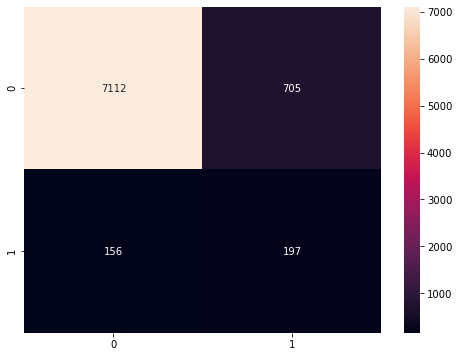

In [57]:
model = LogisticRegression()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
print('Accuracy {} %'.format(np.round(100 * accuracy_score(y_pred,y_test)) ,2))
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize = (8,6))
sns.heatmap(cm , annot = True , fmt='g')
print(classification_report(y_test , y_pred))

### Section 4.2 : XG Boost

Accuracy 90.0 %
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7268
           1       0.65      0.21      0.32       902

    accuracy                           0.90      8170
   macro avg       0.78      0.60      0.63      8170
weighted avg       0.88      0.90      0.88      8170



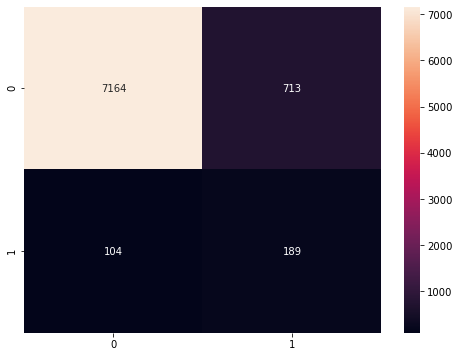

In [58]:
import xgboost as xgb
from xgboost import plot_importance
xgbmodel = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.001, max_depth = 3, n_estimators = 1500)
xgbmodel.fit(X_train_scaled, y_train)
y_pred = xgbmodel.predict(X_test_scaled)
print('Accuracy {} %'.format(np.round(100 * accuracy_score(y_pred,y_test)) ,2))
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize = (8,6))
sns.heatmap(cm , annot = True , fmt='g')
print(classification_report(y_test , y_pred))

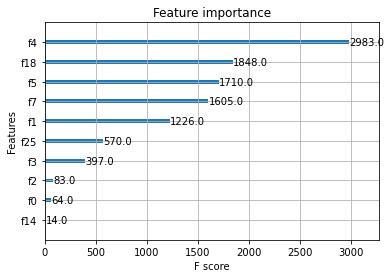

In [59]:
# plot feature importance
plot_importance(xgbmodel);

__Using Scale Pos Weight__

Accuracy 83.0 %
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7268
           1       0.35      0.62      0.45       902

    accuracy                           0.83      8170
   macro avg       0.65      0.74      0.67      8170
weighted avg       0.88      0.83      0.85      8170



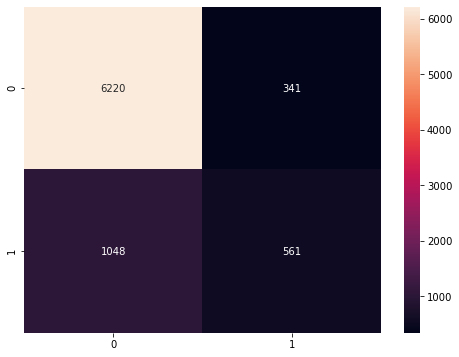

In [60]:
import xgboost as xgb
from collections import Counter
counter = Counter(y_train)
estimate = counter[0] / counter[1]
xgbmodel = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.001, max_depth = 3, n_estimators = 1500 , scale_pos_weight=8)
xgbmodel.fit(X_train, y_train)
y_pred = xgbmodel.predict(X_test)
print('Accuracy {} %'.format(np.round(100 * accuracy_score(y_pred,y_test)) ,2))
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize = (8,6))
sns.heatmap(cm , annot = True , fmt='g')
print(classification_report(y_test , y_pred))

### Section 4.3 : Analyzing Results

|Model|True Positives| True Negatives | False Positives | False Negatives |Accuracy|Precision|Recall|
|-----|--------------|----------------|-----------------|-----------------|--------|---------|------|
|Logistic Regression|197|7112|156|705|89%|56%|22%|
|XGBoost|189|7164|104|713|90%|65%|21%|
|XGBoost with Scale Pos Weight|561|6220|1048|341|83%|35%|62%|

The first thing we notice is that __Accuracy__ is a misleading metric. It was obvious, due to the class imbalance. When dealing with this type of data, the correct measures are __Precision and Recall__. Which one is more important depends on the objectives of the business. However, we still see that both metrics are extremely low for both models. Lets consider the better model :  XGBoost. __65%__ precision means that ___Out of 100 examples that the model predicts that the client would take the deposit, only 65 would in fact do___. In the other hand, __21%__ recall means that ___Out of 100 clients that did take the deposit, only 21 were correctly identified by the model___ . Applying __Scale Pos Weight__ is a hyperparameter used by XGBoost to target the class with least examples. Obviously, this has opposite effects in the metrics: more of the clients who really took the deposit are identified, but precision decreases considerably.

We can also see by looking at the features of the first XGBoost model that __Euribor__ is by far the most important feature to distinguish between clients, which it makes sense because after all deposits are indexed to the euribor. Also the __Contact__ feature was very important and the number of employed.

## Section 5 : Improving the models using SMOTE

__Smote__ stands for __Synthetic Minority Oversampling Technique__ , which is an algorithm to improve the problem of class imbalance by generating synthetic data from near neighbors of the minority class.

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
sm = SMOTE(random_state = 42)
X_res , y_res = sm.fit_resample(X_train_scaled , y_train)

In [63]:
pd.DataFrame(y_res).groupby("y").size()

y
0    28976
1    28976
dtype: int64

### Section 5.1 : Retraining Logistic Regression

Accuracy 80.0 %
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      7268
           1       0.31      0.64      0.41       902

    accuracy                           0.80      8170
   macro avg       0.63      0.73      0.65      8170
weighted avg       0.88      0.80      0.83      8170



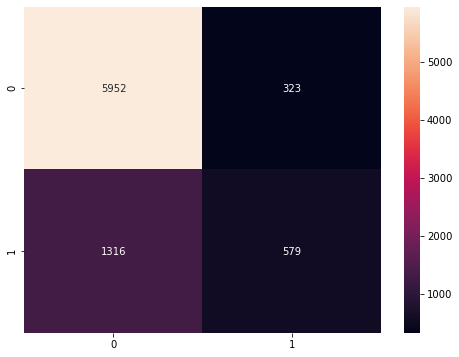

In [64]:
model_lr_2 = LogisticRegression()
model_lr_2.fit(X_res,y_res)
y_pred = model_lr_2.predict(X_test_scaled)
print('Accuracy {} %'.format(np.round(100 * accuracy_score(y_pred,y_test)) ,2))
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize = (8,6))
sns.heatmap(cm , annot = True , fmt='g')
print(classification_report(y_test , y_pred))

Accuracy 83.0 %
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7268
           1       0.35      0.62      0.45       902

    accuracy                           0.83      8170
   macro avg       0.65      0.74      0.67      8170
weighted avg       0.88      0.83      0.85      8170



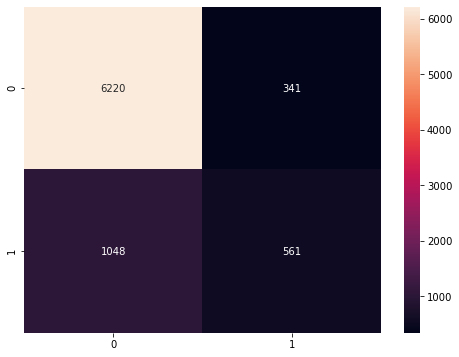

In [65]:
xgbmodel2 = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.001, max_depth = 3, n_estimators = 1500)
xgbmodel2.fit(X_res, y_res)
y_pred = xgbmodel2.predict(X_test_scaled)
print('Accuracy {} %'.format(np.round(100 * accuracy_score(y_pred,y_test)) ,2))
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize = (8,6))
plt.xlabel("XD")
sns.heatmap(cm , annot = True , fmt='g')
print(classification_report(y_test , y_pred))

The most importante effect of using SMOTE is that it improves the Recall by reducing Precision. In the case of XGBoost the effect was the same as using Scale Pos Weight. 

### Section 6 : Conclusions

The present notebook analyzed the direct marketing campaign dataset. It started with an analysis of the different features, understanding the most frequent values and their distributions, paying special attention if they would or wouldn´t be helpful for building a classifier. Due to the low amount of data and the high class imbalance, the complexity of the problem was increased considerably. Two algorithms were chosen: Logistic Regression and XGBoost, being the second one that performed better. XGBoost has a precision of 65% and a very low recall of 21%. Using Scale Pos Weight, the metrics turn around with 35% precision and 62% recall. Again, metrics are quite low so there is a lot of improvement to do. Particular I´d focus on doing more feature engineering (if we can´t find more data).